* [CNN Architecture2](#CNN-Architecture2)
* [JFNet](#JFNet)
* [Network In Netwrok](#Network-In-Netwrok)
* [GoogLeNet](#GoogLeNet)

   
## CNN Architecture2
- LeNet, AlexNet, **JFNet,Network In Netwrok,GoogLeNet, VGGNet**, ResNet, Batch Normalization


## JFNet
- 논문 Visualizing and Understanding Convolutional Networks
    -  CNN에서 학습된 특징을 시각화하여 개발 CNN의 비밀을 밝혀냄
    - 새로운 구조가 아닌 시각화로 AlexNet의 구조를 **hyper parameter tuning** 으로 성능 개선 시킬 수 있음을 보여줌
    
### 특징
- CNN 과정 : Feature map → Convolution → Activation → Pooling
- 과정을 반대로 하여 각 레이어가 갖는 값을 구함
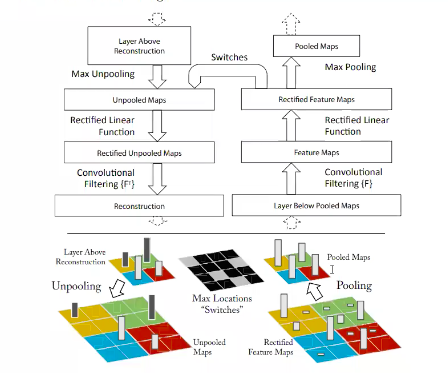
- **Visualization with a Deconvnet** 
    - Unpooling: 큰 값의 위치를 flag형태로 저장해서 unpooling하기 때문에 최대값이 아닌 값들은 알 수 없음
    - Rectifications: 음수는 0이 되어 완벽히 복원 불가하지만 영향력은 미미하다고 밝혀짐
    - Decovolution: convolution연산의 결과값과 weights 이용해서 input 구함
구조
- AlexNet과 비슷하나 각 kerne size , stride 줄임
- conv2d  크기 증가 시킴

시각화
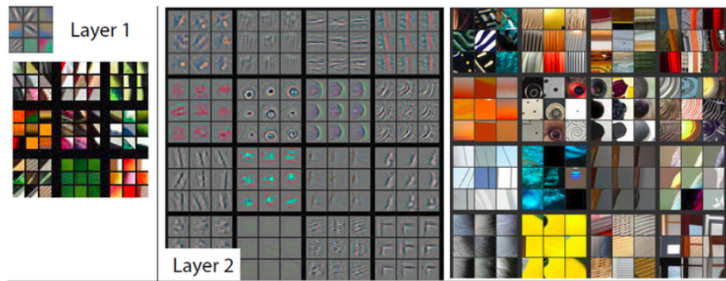
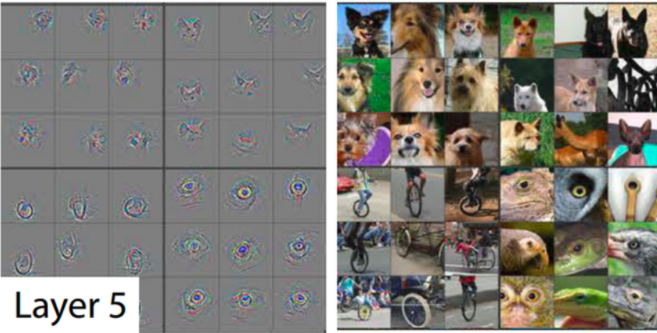
- 초기에는 layer가 low level feature(색상, edge)로 간단했는데 점점 추상화된 레이어로 학습( hierarchical feature) 복잡한 특징 추출
- activation 값에서 실제 가장 강한 feature map 보면 활성화 된 부분을 볼 수 있음( 가장 큰 특징== 컨볼루션 연산의 큰값
    - layer가 깊어질수록 feature 를 습득하려면 오래걸림

---
## Network In Network
- NIN 성능 안 좋지만 기존의 CNN구조와 다르지만 새로운 방법론 제시
    - 기존의 CNN: featrue extraction( convolution + pooling) , classifier(FCNN)
    - local receptive field에서 feature추출시 filter가 linear하여 비선형적인 feature추출은 어려움
    - feature map 갯수를 늘리면 연산량이 늘어나기 때문
    
#### 1.Mlpconv layer 
- filter 대신 MLP(multi-layer perceptron)을 삽입하여 비선형 feature 추출(NIN)
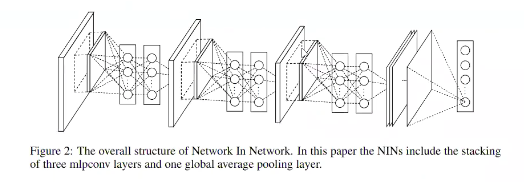
- 동일한 레이어를 반복해서 **stacking** 

#### 2.Global Average Pooling 
- 마지막 레이어 dense 대신에 **Global Average Pooling ** 
    - 전체 레이어에서 각 레이어를 하나의 값으로 avg pooling하여 **학습시킬 파라미터수를 줄여서** 과적합 피함.
    - 앞에서 convolution으로 비선형적인 특징도 잘 추출햇기 때문에 FCNN대신에 pooling 만으로도 충분 

#### 3.1x1 convolution
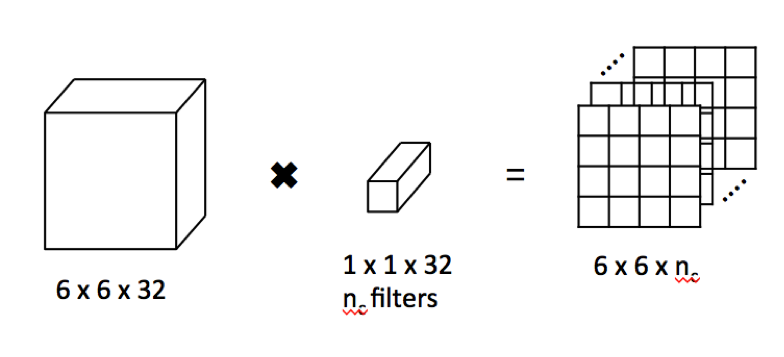
- Cross Channel Down sampling: 비선형성을 더하면서 channel을 줄려서 차원 축소
- feature map & 연산량 줄어들음

 CNN의 구조가 **레이어가 10개 이상을 사용하면서 깊어지기** 시작함
 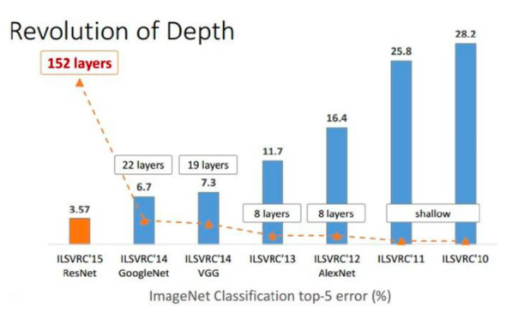
 - AlexNet 8 layers
 - GooLeNEt 22 layers
 - VGG 19 layers
 
문제점:
- trainable parameter 수 증가 하면서 과적합 가능성 높아짐
    - 연산량(시간), 제한된 하드웨어
    - 하이퍼파마미터 튜닝, 초기값 설정으로도 제한적
- 차원의 저주를 해결하기 위해 더 많은 데이터 구하기 힘듦.

--- 
## GoogLeNet
- 2014 ImageNet 1등
- 논문: **Going deeper** with convolutions
- **더 많은 레이어 사용하면서 parameter 수를 줄여** 연산량을 줄임: 20개 이상의 레이어
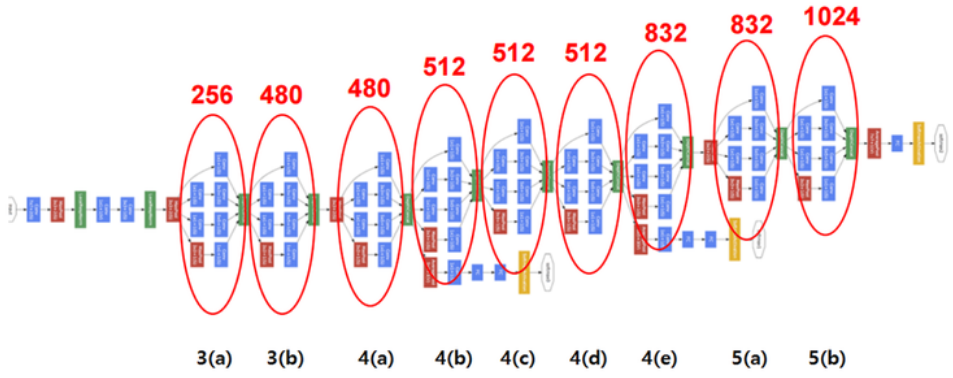

#### 1.Inception module 
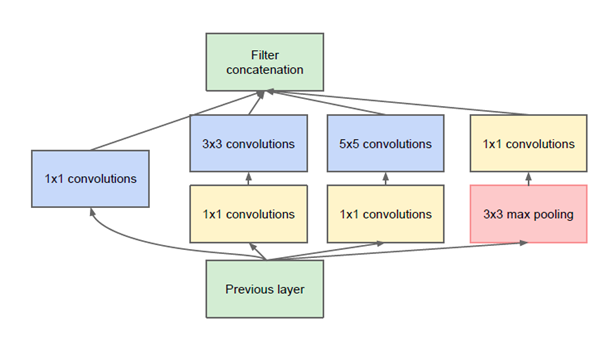
- Network in Netowrk 의 stacking, global avg pooling 기반으로 발전
    - convolution 병렬사용
        - 같은 레이어에서 다양한 n 크기의 convolution filter로 학습하여 다양한 크기의 feature 를 추출(연산량 증가)
  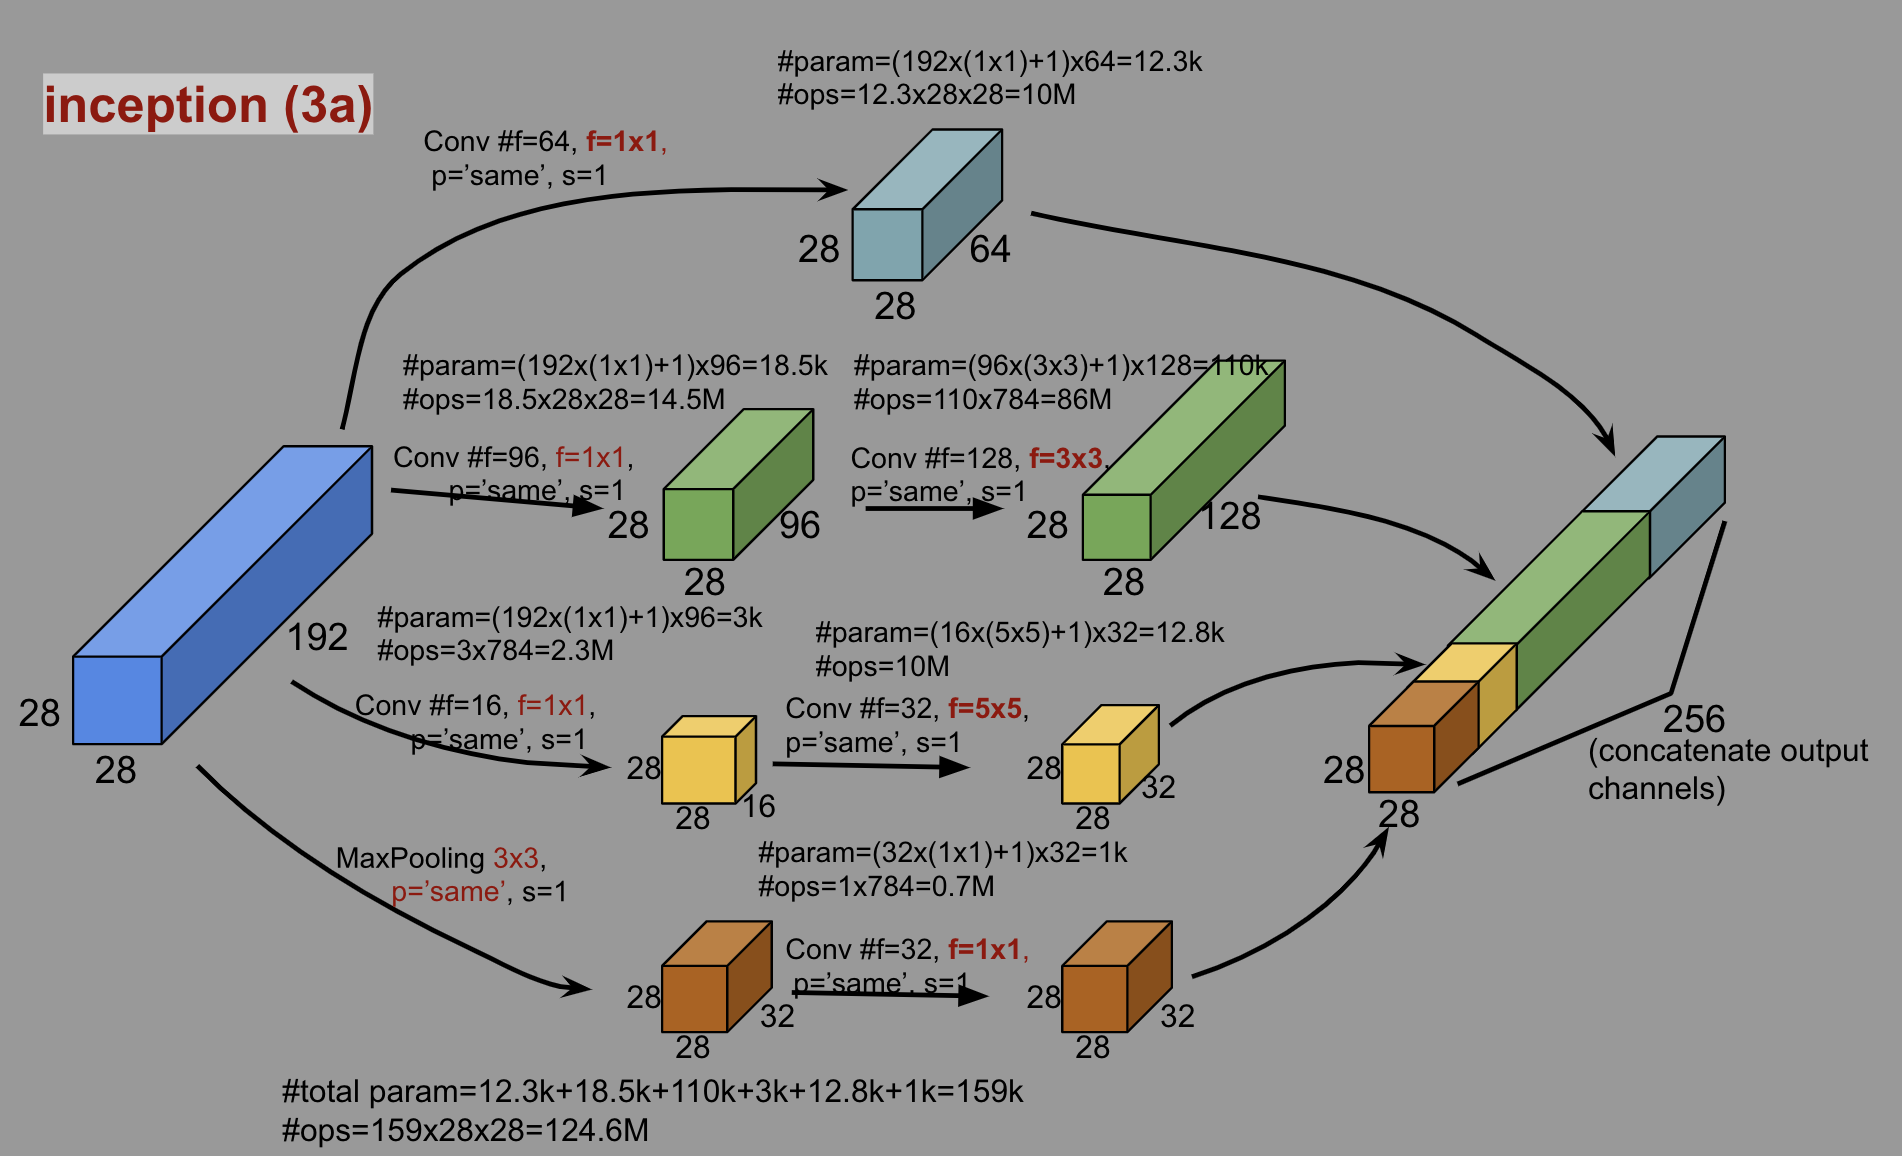
    - 1x1 convolution 으로 차원축소하여 parameter 감소
    - 9개의 인셉션 모듈 사용        
    >  AlexNet과 비교해보면 학습 파라미터 1/12와 연산량이 엄청나게 적음

#### 2.Auxiliary classifier
 - 깊어질수록 성능이 안 좋을거라 가정해서 gradient vanishing 해결하기 위해서 back propagation 보조 분류기의 결과를 합쳐서 해결 
 - gradient 값을 보고 위치 결정
    > 논문: Rethinking the Inception Architecture for Computer Vision 
    - Dropout, Batch Normalization: 어느정도 regularizer 역할을 함

>  확장시켜서 inception net 만듦

---
##  VGGNet
- Oxford 대학의 Visual Geometry Group
- 2014 이미지넷 2등 
- 논문: Very Deep Convolutional Networks for Large-scale Recognition
    - CNN 성능에 대한 **Network 깊이가 끼치는 영향**주는지 6개의 구조로 실험
    - GoogLeNet 보다 레이어 19개로 모델이 단순하지만 성능 좋음


#### Architecture
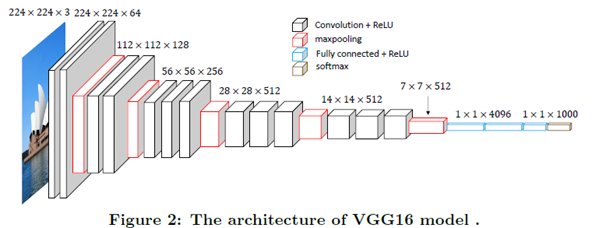
-  3x3 Filter (Stride, Pad: 1)와 2x2 Max pooling (Stride: 2)만 사용 하여 Layer 수가 11 ~ 19개인 6개의 구조 로 테스트
- 16개 이상의 레이어에서는 큰 성능 차이가 없음( 문제, 데이터에 따라 다름) 
-  Local Response Normalization (LRN) 효과가 없고 오히려 메모리 소모와 연산량을 증가시킴
- output layer에 3개의 FCNN 사용하여 레이어가 더 많은 GoogLeNet(5 mil)보다 trainable parameters 최소 133mil으로 많음 




#### 1. Factorizing convolution
-  5x5 또는 7x7 Filter를 인수분해하여 (Factorizing) 2개 또는 3개의 3x3 Filter를 stacking하면, Network는 깊어지면서 Parameter 수는 줄임
- 종류: 3x3 Convolution, 1x1 Convolution
    - 큰 필터 대신 3x3 convolution 2번 사용하면 비선형 활성 함수 사용이 늘어나 feature추출 더 잘됨 (레이어수 > 필터 크기)
    - 3x3이 1x1보다 공간정보 (Spatial context) 더 잘 추출하고 최소한의 receptive field
-  Implicit regularization
- 1x1를 차원축소 목적이 아닌 활성함수를 이용 추가적 비선형성 확보를 위해 사용
    
#### 2. Pre-initialization
- Deep한 Network 학습 시 Vanishing/Exploding gradient 문제로 학습이 어려운 문제 발생하여  11 Layer 구조를 학습 후 이후 구조에서 학습된 Parameter 값을 초기값으로 사용하여 해결 ( GoogLeNet에서는 Auxiliary classifier로 해결함)

#### 3.Data 
- 학습 : multi-scale: scale jittering [256,512] 사이즈 범위내에  이미지 비율을 유지하면서 랜덤한 크기로 학습
     - Random RGB color shift
- 검정 : 
        - multi-crop: 각 3가지 스케일 별로 50개 crops 총 150
         학습이미지로부터 여러개 patch, crop하여 많은 영상을 만들어낸 후 결과를voting 통해 최종결과를 
        - dense evaluation 
        > OverFeat : Integrated Recognition, Localization and Detection using Convolutional Networks
 
 
---
## OverFest
- 2013 ILSVRC localization 1위, detection1위, classification 4위
- 논문: OverFeat : Integrated Recognition, Localization and Detection using Convolutional Networks
    - localization, classification, detection 통합 프레임워크 제공
     
 - classification: 객체가 영생내 존재여부를 5개의 후보와 ground-truth 정답 비교로 성능 지표
 - localization : bounding box통해 물체 존재 영역 파악하여 50%이상 영역이 일치하면 맞음
 - detection : 이미지/영상내 학습된 객체를 가능한 가장 많이 추정


#### Data 
- 학습 : 256 scaling, milti-crop & flip
- 검정 : 
    - multi-scale
    - **dense evaluation**
    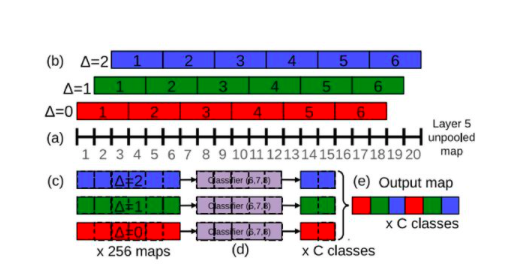
    > LeCun: FC-layer 는 1x1  convolution으로 sliding window적용
    - 특정 위치를 resolution 단위로 선택하여 scale이 변화여도 맞추어서 sliding window 적용
